In [ ]:
#Onde faz a  Importação e Carregamento

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io #

from google.colab import files
uploaded = files.upload()

#Nome do arquivo que foi carregado
file_name = list(uploaded.keys())[0]

#Usa o nome do arquivo para ler o DataFrame
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

#Confirma o carregamento
print("DataFrame carregado com sucesso! Nome do arquivo utilizado:", file_name)
print(df.head())

Saving train.csv to train.csv
DataFrame carregado com sucesso! Nome do arquivo utilizado: train.csv
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0

In [ ]:
#Informações basicas(tipos de dados e contagem de não-nulos)
print("--- 1. Informações do DataFrame (df.info()) ---")
df.info()

#Estatística descritivas para colunas numericas
print("\n--- 2. Estatísticas Descritivas (df.describe()) ---")
print(df.describe())

--- 1. Informações do DataFrame (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- 2. Estatísticas Descritivas (df.describe()) ---
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mea

In [ ]:
#Contagem de valores nulos por coluna
print("\n--- 3. Contagem de Valores Ausentes ---")
print(df.isnull().sum())


--- 3. Contagem de Valores Ausentes ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


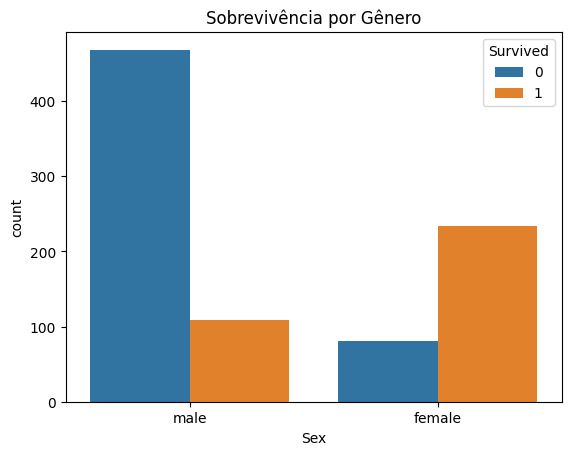

In [ ]:
#Grafico de barras para Sobrevivência vs Sexo
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Sobrevivência por Gênero')
plt.show()

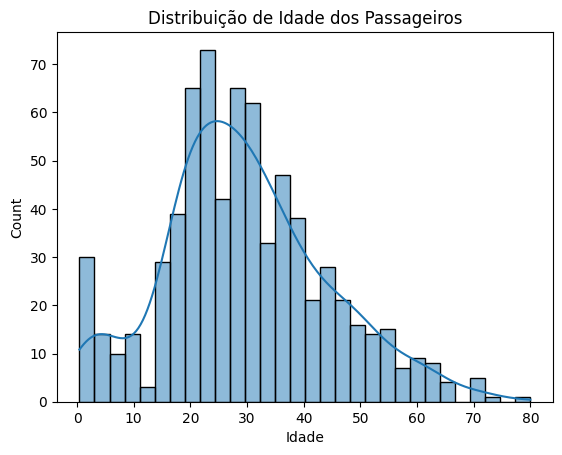

In [ ]:
#Histograma da Idade
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title('Distribuição de Idade dos Passageiros')
plt.xlabel('Idade')
plt.show()

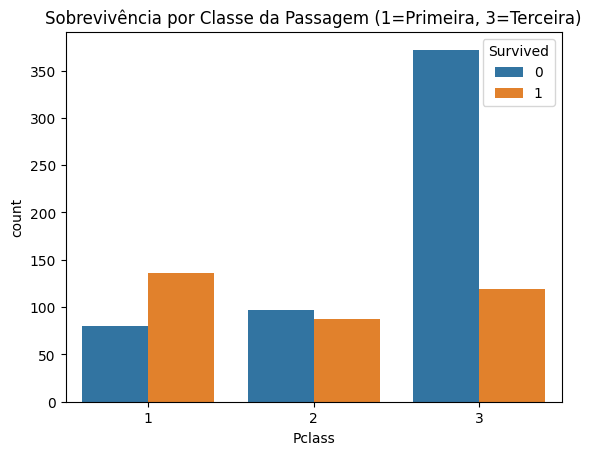

In [ ]:
#Grafico de barras para Sobrevivência vs Classe
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Sobrevivência por Classe da Passagem (1=Primeira, 3=Terceira)')
plt.show()

In [ ]:
#Preenche valores ausentes em 'Age' com a mediana
df['Age'].fillna(df['Age'].median(), inplace=True)
print("Valores nulos em 'Age' preenchidos com a mediana.")

Valores nulos em 'Age' preenchidos com a mediana.


/tmp/ipython-input-2954400572.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [ ]:
#Preenche valores ausentes em 'Embarked' com o valor mais frequente (moda)
most_frequent_port = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_port, inplace=True)
print("Valores nulos em 'Embarked' preenchidos com a moda.")

Valores nulos em 'Embarked' preenchidos com a moda.


/tmp/ipython-input-2943712054.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(most_frequent_port, inplace=True)


In [ ]:
#Remove colunas desnecessárias para o modelo simples
#'Cabin' (muitos nulos), 'Name', 'Ticket' e 'PassengerId' (IDs e textos livres)
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)
print("Colunas 'Cabin', 'Name', 'Ticket', 'PassengerId' removidas.")

Colunas 'Cabin', 'Name', 'Ticket', 'PassengerId' removidas.


In [ ]:
#Verifica se todos os valores nulos foram tratados
print("\n--- Verificação de Nulos após Tratamento ---")
print(df.isnull().sum())


--- Verificação de Nulos após Tratamento ---
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [ ]:
#Codificação
#pd.get_dummies cria colunas binárias (0 ou 1) para cada categoria
#'drop_first=True' evita multicolinearidade (por exemplo, se não é masculino, é feminino)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


df = pd.get_dummies(df, columns=['Pclass'], prefix='Pclass', drop_first=True)

print("Codificação concluída. Primeiras linhas do DataFrame numérico:")
print(df.head())

Codificação concluída. Primeiras linhas do DataFrame numérico:
   Survived   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S  \
0         0  22.0      1      0   7.2500      True       False        True   
1         1  38.0      1      0  71.2833     False       False       False   
2         1  26.0      0      0   7.9250     False       False        True   
3         1  35.0      1      0  53.1000     False       False        True   
4         0  35.0      0      0   8.0500      True       False        True   

   Pclass_2  Pclass_3  
0     False      True  
1     False     False  
2     False      True  
3     False     False  
4     False      True  


In [ ]:
#Defini Variaveis de Entrada (X) e Saída (y)
y = df['Survived']       # Aqui é a variável alvo (o que queremos prever)
X = df.drop('Survived', axis=1)

print("Variáveis X (features) prontas para o treinamento.")

Variáveis X (features) prontas para o treinamento.


In [ ]:
#Divisão em Treino e Teste (80% para treino, 20% para teste)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Dados de Treino: {X_train.shape[0]} amostras")
print(f"Dados de Teste: {X_test.shape[0]} amostras")

Dados de Treino: 712 amostras
Dados de Teste: 179 amostras


In [ ]:
#Treinamento do Modelo Arvore de Decisão
from sklearn.tree import DecisionTreeClassifier

#Instanciar e treinar
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

#Fazer previsões no conjunto de teste
y_pred = model_dt.predict(X_test)

print("Modelo treinado e previsões feitas no conjunto de teste.")

Modelo treinado e previsões feitas no conjunto de teste.


In [ ]:
#Cria um novo bloco de código para as Métricas

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

#Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Acurácia): {accuracy:.4f}")

#Precision e Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensibilidade): {recall:.4f}")

#Relatório completo
print("\n--- Relatório de Classificação ---")
print(classification_report(y_test, y_pred))

Accuracy (Acurácia): 0.7654
Precision: 0.7105
Recall (Sensibilidade): 0.7297

--- Relatório de Classificação ---
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       105
           1       0.71      0.73      0.72        74

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



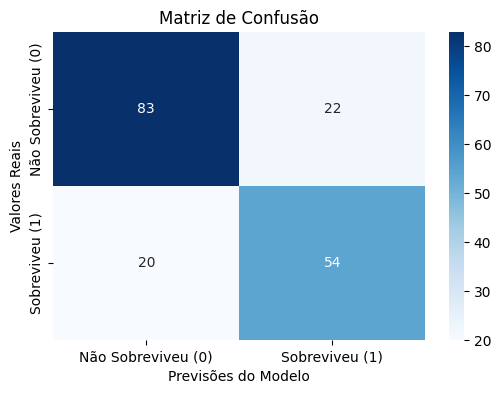

In [ ]:
#Cria um novo bloco de código para a Matriz de Confusão

#Calcula a Matriz de Confusao
cm = confusion_matrix(y_test, y_pred)

#Visualiza a Matriz de Confusao
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Sobreviveu (0)', 'Sobreviveu (1)'],
            yticklabels=['Não Sobreviveu (0)', 'Sobreviveu (1)'])
plt.ylabel('Valores Reais')
plt.xlabel('Previsões do Modelo')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
#EXPERIMENTO 2:Treina  a Árvore com Profundidade Máxima = 3

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Instancia o modelo limitando a profundidade
model_dt_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)

#Treina o novo modelo
model_dt_depth3.fit(X_train, y_train)

#Fazer as  previsões
y_pred_depth3 = model_dt_depth3.predict(X_test)

#Calcula a  Accuracy
accuracy_depth3 = accuracy_score(y_test, y_pred_depth3)
print(f"Accuracy (max_depth=3): {accuracy_depth3:.4f}")

Accuracy (max_depth=3): 0.7989


In [ ]:
#EXPERIMENTO 3: Remoção da variável Parch (Pais/Filhos)

#Cria novo conjunto de features (X_exp3) sem a coluna 'Parch'
X_exp3 = X.drop('Parch', axis=1)

#Dividi o novo conjunto (X_exp3 e y) em treino/teste
X_train_exp3, X_test_exp3, y_train_exp3, y_test_exp3 = train_test_split(
    X_exp3, y, test_size=0.2, random_state=42
)

#Treina o modelo (usando max_depth=3 para consistência)
model_dt_exp3 = DecisionTreeClassifier(max_depth=3, random_state=42)
model_dt_exp3.fit(X_train_exp3, y_train_exp3)

#Faz previsões
y_pred_exp3 = model_dt_exp3.predict(X_test_exp3)

#Calcula a Accuracy
accuracy_exp3 = accuracy_score(y_test_exp3, y_pred_exp3)
print(f"Accuracy (sem a variável Parch, depth=3): {accuracy_exp3:.4f}")

Accuracy (sem a variável Parch, depth=3): 0.7989


In [ ]:
#Onde faz comparações

print("\n--- Tabela de Comparação de Experimentos ---")
resultados = pd.DataFrame({
    'Experimento': ['1. Árvore Completa (Padrão)', '2. Árvore Profundidade=3', '3. Árvore sem Parch, Profundidade=3'],
    'Accuracy': [accuracy, accuracy_depth3, accuracy_exp3],
    'Método': ['Sem restrição de profundidade', 'max_depth=3', 'max_depth=3 e remoção de feature']
})
print(resultados.sort_values(by='Accuracy', ascending=False))


--- Tabela de Comparação de Experimentos ---
                           Experimento  Accuracy  \
1             2. Árvore Profundidade=3  0.798883   
2  3. Árvore sem Parch, Profundidade=3  0.798883   
0          1. Árvore Completa (Padrão)  0.765363   

                             Método  
1                       max_depth=3  
2  max_depth=3 e remoção de feature  
0     Sem restrição de profundidade  
